In [11]:
import pandas as pd
import website_parser
import json
import trafilatura
import nltk
from collections import Counter
import numpy as np
df = pd.read_csv("colon_cancer_news_articles/article_urls.csv", header = 0)


In [7]:
set_of_words = {'able',
 'according',
 'achievable',
 'acknowledge',
 'agree',
 'allege',
 'apparently',
 'arguable',
 'arguably',
 'argues',
 'assert',
 'assertion',
 'assess',
 'assessment',
 'assume',
 'assumption',
 'attainable',
 'be convinced',
 'belief',
 'believe',
 'can',
 'capable',
 'case',
 'certain',
 'certainly',
 'chance',
 'claim',
 'conceivable',
 'conclude',
 'conclusive',
 'confirm',
 'confirms',
 'consider',
 'contend',
 'contention',
 'contradict',
 'conviction',
 'could',
 'cure',
 'debatably',
 'deem',
 'definite',
 'definitely',
 'demonstrate',
 'deny',
 'disagree',
 'disapprove',
 'dispute',
 'disregard',
 'doubt',
 'effective',
 'emphasise',
 'establish',
 'feasible',
 'feel',
 'feeling',
 'guarantee',
 'hold',
 'identify',
 'if',
 'imaginable',
 'impossible',
 'incapable',
 'indicate',
 'ineffective',
 'invalidate',
 'judge',
 'judgement',
 'know',
 'likely',
 'maintain',
 'make clear',
 'may',
 'mention',
 'might',
 'no doubt',
 'nominally',
 'note',
 'observe',
 'obtainable',
 'opine',
 'opinion',
 'oppose',
 'perhaps',
 'plausibly',
 'point out',
 'position',
 'possible',
 'potential',
 'probable',
 'propose',
 'prove',
 'ready',
 'realise',
 'reality',
 'reasonable',
 'recommend',
 'reject',
 'say',
 'seemingly',
 'seems',
 'should',
 'show',
 'speculate',
 'speculation',
 'state',
 'states',
 'stress',
 'suggest',
 'suggestion',
 'suitable',
 'suppose',
 'supposition',
 'surely',
 'suspect',
 'tenable',
 'think',
 'unable',
 'undeniably',
 'undoubtedly',
 'unlikely',
 'unquestionably',
 'unsuitable',
 'viable',
 'view',
 'will',
 'would,ought to',
 'write'}

In [2]:
import spacy
nlp = spacy.load('en_core_web_trf')

In [13]:
wp = website_parser.WebsiteParser(df.url[10])

In [14]:
pay = wp.get_payload()

C:\Users\Colmj\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [15]:
for k,v in json.loads(pay)["sentence_map"].items():
    doc = nlp(v)
    sub_toks = [[token for token in tok.subtree] for tok in doc if (tok.dep_ == "nsubj")]
    verbs = [(tok, tok.tag_) for tok in doc if tok.pos_ == "VERB"]
    print(verbs)
    print(sub_toks) 
    print([[token for token in tok.subtree] for tok in doc if tok.tag_ == 'MD'])
    print(v)
    print()


[(called, 'VBN'), (received, 'VBN'), (fuel, 'VB')]
[[A, major, international, study, of, colorectal, cancer, called, the, ColoCare, Study]]
[]
Newswise — SALT LAKE CITY, Utah – A major international study of colorectal cancer called the ColoCare Study has received a five-year renewal and $10 million to fuel new innovations in colorectal cancer treatment.

[(focus, 'VB'), (developing, 'VBG'), (based, 'VBN')]
[[This, next, phase, of, the, project]]
[[will]]
This next phase of the project will focus on developing new medical interventions based on earlier research findings from the ColoCare Study.

[(engage, 'VB'), (designed, 'VBN'), (yield, 'VB'), (tailored, 'VBN'), (facing, 'VBG')]
[[It]]
[[will]]
It will also engage more patients in the research designed to yield insights into new tailored treatment approaches to critical unmet medical needs facing individuals with colorectal cancer.

[(headquartered, 'VBN')]
[]
[]
The ColoCare Study is headquartered at Huntsman Cancer Institute (HCI) 

In [19]:
X = []
word_counts = []
for url in df.url[1:]:
    par = website_parser.WebsiteParser(url)
    pay = par.get_payload()
    pay_json = json.loads(pay)
    t1, t2 = get_stance_vector(" ".join(pay_json["sentence_map"].values()))
    doc = nlp(" ".join(pay_json["sentence_map"].values()))
    sub_toks = [[token for token in tok.subtree] for tok in doc if (tok.text.lower() in set_of_words)]
    print(sub_toks)
    X.append(np.array(t1))
    word_counts.append(t2)

    

[[can], [this, case], [the, feeling, of, not, having, emptied, the, bowel, properly], [the, feeling, of, not, having, emptied, the, bowel], [certain], [certain], [can], [If], [most, likely, that, it, is, hemorrhoid], [will], [will], [Though, many, researchers, say, that, hemorrhoids, do, not, lead, to, cancer], [should]]
[[may], [could], [according, to, a, research, paper, published, in, JNCI, Cancer, Spectrum], [can], [the, chance, of, developing, colorectal, adenoma], [according, to, the, study, authors], [the, United, States], [an, increased, chance, of, adenoma], [may], [able, to, reduce, their, risk, for, developing, colorectal, adenoma, by, losing, weight], [Our, findings, suggest, that, avoiding, weight, gain, in, adulthood, may, help, lower, someone, ’s, chance, of, developing, a, pre, -, cancerous, growth, called, colorectal, adenoma, ,, which, may, in, turn, reduce, the, risk, of, developing, colorectal, cancer], [may], [someone, ’s, chance, of, developing, a, pre, -, cancero

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [41]:
pca = PCA(n_components=2)
decomp = pca.fit_transform(X)

In [42]:
import matplotlib.pyplot as plt

In [84]:
par = website_parser.WebsiteParser(df.url[22])
pay = par.get_payload()
pay_json = json.loads(pay)
pay_json["sentence_map"]

{'0.0': 'Distant-stage colon cancer showing up more in younger adults, study says',
 '1.0': 'CDC data from 2018 shows 52,163 people died of colon and rectum cancer',
 '2.0': 'Younger adults may have the highest risk of presenting with distant-stage colorectal cancer, according to researchers.',
 '2.1': 'A distant-stage cancer is one that has spread beyond adjacent organs or tissues.',
 '3.0': 'Colorectal cancer, sometimes called colon cancer, occurs when cells in the colon or rectum grow out of control.',
 '4.0': 'In a study published this week in a journal by the American Association for Cancer Research, the authors analyzed annual incidence data in the U.S. SEER 18 cancer registry from the years 2000-2016, including 103,975 patients with colorectal adenocarcinoma.',
 '5.0': 'START SCREENINGS FOR COLORECTAL CANCER AT AGE 45, PANEL ADVISES',
 '6.0': 'Adenocarcinoma is a type of cancer that may occur almost anywhere in the body, starting in glands that line the insides of the organs, ac

In [82]:
counter = 0
for wc in word_counts:

    if 'will' in wc.keys():
        print(counter, wc)

    counter+=1


0 {'can': 0.0034965034965034965, 'case': 0.0017482517482517483, 'feeling': 0.0034965034965034965, 'certain': 0.0034965034965034965, 'if': 0.0017482517482517483, 'likely': 0.0017482517482517483, 'will': 0.0034965034965034965, 'say': 0.0017482517482517483, 'should': 0.0017482517482517483}
9 {'will': 0.004882017900732303, 'states': 0.0008136696501220504, 'according': 0.0008136696501220504, 'show': 0.0008136696501220504, 'likely': 0.0016273393002441008, 'can': 0.006509357200976403, 'stress': 0.0016273393002441008, 'effective': 0.0008136696501220504, 'potential': 0.0008136696501220504, 'indicate': 0.0008136696501220504}
12 {'feel': 0.0018281535648994515, 'if': 0.0018281535648994515, 'definitely': 0.0018281535648994515, 'recommend': 0.0018281535648994515, 'able': 0.0018281535648994515, 'effective': 0.0018281535648994515, 'could': 0.003656307129798903, 'will': 0.003656307129798903, 'can': 0.0018281535648994515, 'possible': 0.003656307129798903, 'potential': 0.0018281535648994515}
13 {'confirm

(-0.01, 0.0125)

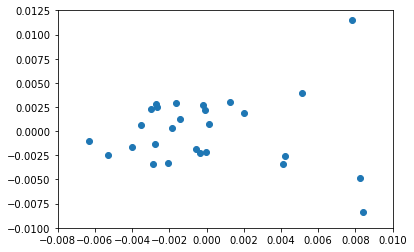

In [79]:
sample = 25
plt.scatter(decomp[:, 0], decomp[:, 1])
plt.xlim([-0.008, 0.01])
plt.ylim([-0.01, 0.0125])

In [22]:
par = website_parser.WebsiteParser(df.url[5])
pay = par.get_payload()
pay_json = json.loads(pay)
sV, swC = get_stance_vector(" ".join(pay_json["sentence_map"].values()))
swC

{'according': 0.008602150537634409,
 'likely': 0.004301075268817204,
 'could': 0.002150537634408602,
 'say': 0.002150537634408602,
 'recommend': 0.002150537634408602,
 'may': 0.004301075268817204,
 'states': 0.002150537634408602,
 'if': 0.004301075268817204,
 'can': 0.002150537634408602}

NameError: name 'sV' is not defined

In [20]:
def get_stance_vector(doc):
    token_count = 0
    tokens = nltk.word_tokenize(doc)
    stance_word_counter = Counter()
    for token in tokens:
        if token.lower() in set_of_words:
            stance_word_counter[token.lower()] += 1
        token_count += 1
    
    stance_word_counter = {k: v/token_count for k,v in stance_word_counter.items()}

    stance_vector = []

    for w in list(set_of_words):
        if w in stance_word_counter.keys():
            stance_vector.append(stance_word_counter[w])
        else:
            stance_vector.append(0)

    return stance_vector, stance_word_counter
            



    

    
    

